In [19]:
import pickle

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

In [20]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [21]:
IN_DIR = "D:\\result\\20221028\\"
OUT_DIR = "D:\\result\\20221028\\"
sub_dir_list = [
    "dual_1\\1\\",
    "dual_1\\2\\",
    "dual_1\\3\\",
    "dual_1\\4\\",
    "dual_1\\5\\",
    "dual_1\\6\\",
]

In [22]:
ptv_result = np.zeros((1, 6))

In [23]:
for d in range(0, 6):
    for i in tqdm(range(0, 10900)):
        try:
            tmp = np.loadtxt(OUT_DIR + "ptv\\" + sub_dir_list[d] + f"pp_{i}.csv", delimiter=',', skiprows=1)
        except StopIteration:
            tmp = None
        except OSError:
            tmp = None

        if tmp is None:
            pass
        elif tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                tmp = None
        elif tmp.ndim == 2:
            pass
        else:
            tmp = None

        if tmp is None:
            pass
        else:
            ptv_result = np.vstack([ptv_result, tmp])

100%|██████████| 10900/10900 [03:53<00:00, 46.60it/s]


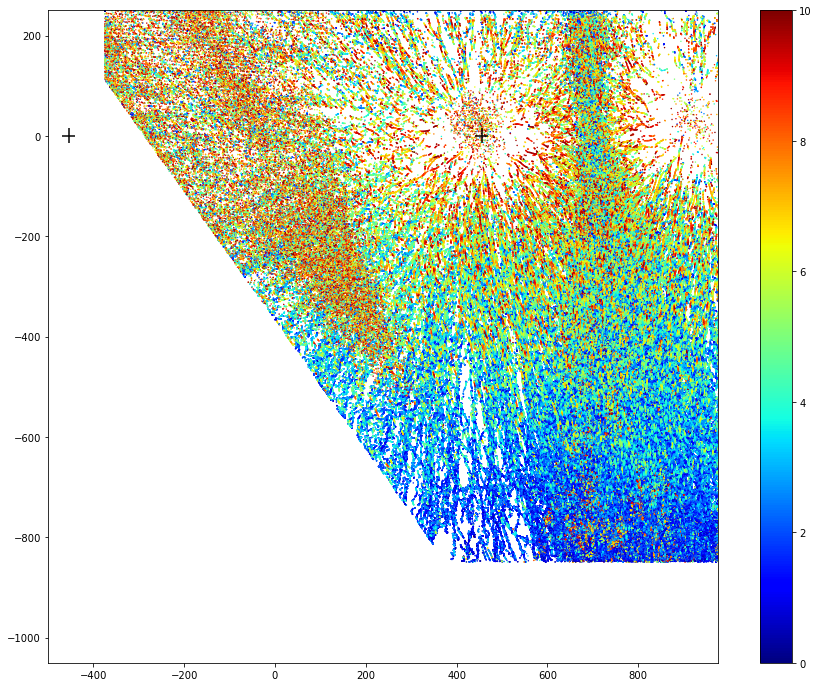

In [24]:
fig, ax = plt.subplots(figsize=(15, 12))
plt.xlim(-1100, 900)
plt.ylim(-850, 250)

c = ax.quiver(ptv_result[:, 0]-1100, -ptv_result[:, 1]+250, ptv_result[:, 2], -ptv_result[:, 3], np.sqrt(ptv_result[:, 2]**2 + ptv_result[:, 3]**2), cmap="jet")

fig.colorbar(c)
plt.show()

In [25]:
ptv_result = pd.DataFrame(ptv_result, columns=['x', 'y', 'dx', 'dy', 'p0', 'p1'])
for row in tqdm(ptv_result.index):
    if (ptv_result.loc[row] == 0).all():
        ptv_result.drop(row, axis=0, inplace=True)

 52%|█████▏    | 907495/1743593 [51:24<47:21, 294.22it/s]  


KeyboardInterrupt: 

In [ ]:
with open(f'ptv_result_A.pickle', mode='wb') as fp:
    pickle.dump(ptv_result, fp)